### 📌 Function Transformer (in data preprocessing / statistics)

A **function transformer** is a method that applies a mathematical function to data to make it easier to analyze or model.

- Example functions: **log, square root, reciprocal, standard scaling, etc.**  
- Purpose: To make the data more **normal (Gaussian-like)**, reduce skewness, stabilize variance, or handle outliers.


---

### 🔑 Log Transformer

- **Definition**: Applies the logarithm function to data.  
- **Use**: Reduces **skewness** (when data is heavily right-skewed), makes large values smaller, and stabilizes variance.  
- **Example**:  
  If you have income data: `[1000, 5000, 100000]`  
  Log transform → `[6.9, 8.5, 11.5]`  
  (The extreme difference shrinks.)

  ---

### 🔄 Reciprocal Transform
- **Definition**: Applies the reciprocal function (1/x) to data.  
- **Use**: Helpful for reducing the effect of very large values and for handling extreme right-skew.  
- **Example**:  
  `[1, 2, 10]` → `[1.0, 0.5, 0.1]`  

---

### 📐 Square Root Transform
- **Definition**: Applies the square root function to data.  
- **Use**: Useful for reducing **moderate skewness** and stabilizing variance.  
- **Example**:  
  `[1, 4, 16]` → `[1, 2, 4]`  

---

### 🔲 Square Transform
- **Definition**: Applies the square function to data.  
- **Use**: Can **reduce left skewness** (when data is skewed to the left) and spread out smaller values.  
- **Example**:  
  `[1, 2, 3]` → `[1, 4, 9]`  

## Example

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=  pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\Data Science\CSVS\train.csv" , usecols=['Age' , 'Fare' ,'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_23668\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[: , 1:3]
y = df.iloc[: , 0]

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2 , random_state=42)

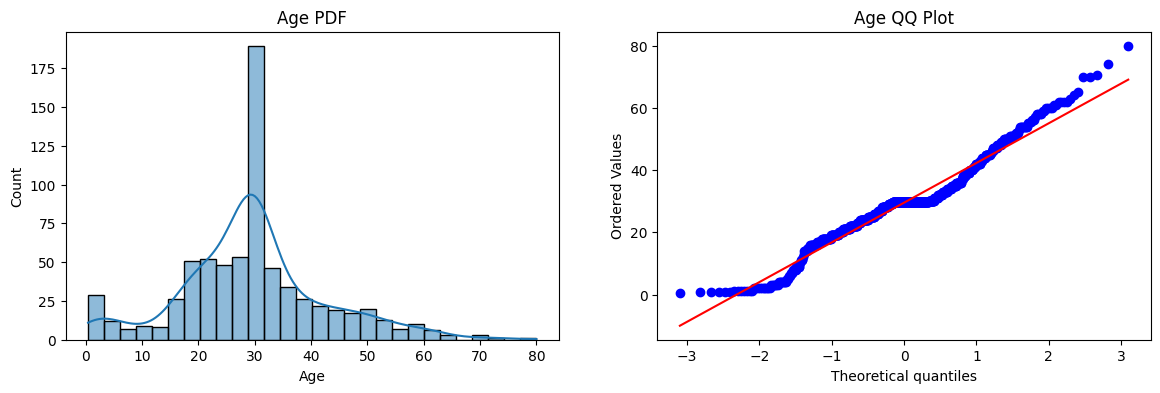

In [9]:

plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')
plt.show()

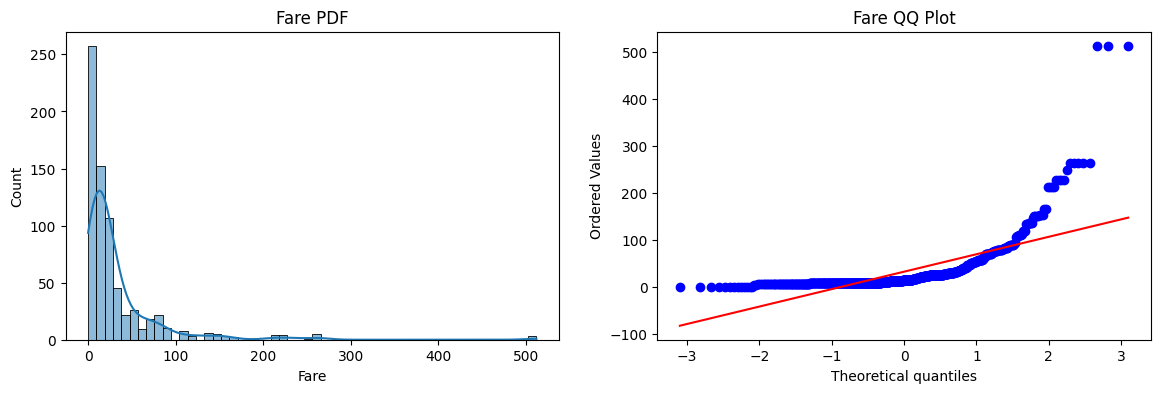

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [11]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf1.fit(x_train , y_train)
clf2.fit(x_train , y_train)

y_pred_1 = clf1.predict(x_test)
y_pred_2 = clf2.predict(x_test)

print("Accuracy of LR" , accuracy_score(y_test , y_pred_1))
print("Accuracy of DT" , accuracy_score(y_test , y_pred_2))

Accuracy of LR 0.6480446927374302
Accuracy of DT 0.6536312849162011


In [14]:
trf = FunctionTransformer(func =np.log1p)

In [15]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [18]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
clf1.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred_1 = clf1.predict(x_test_transformed)
y_pred_2 = clf2.predict(x_test_transformed)

print("Accuracy of LR", accuracy_score(y_test, y_pred_1))
print("Accuracy of DT", accuracy_score(y_test, y_pred_2))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.664804469273743


Text(0.5, 1.0, 'Age after log')

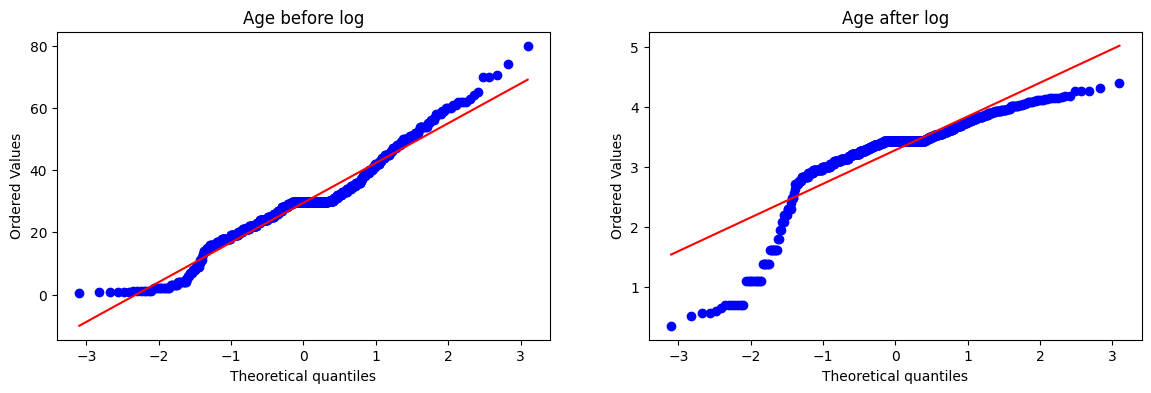

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm',plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm',plot=plt)
plt.title('Age after log')

In [ ]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]


    trf = ColumnTransformer([('log', FunctionTransformer(transform), 'Fare')], remainder='passthrough')
    # First, it applies the transformation to Fare.Then, it appends the other columns (like Age) after it.So, in the output array : Column 0 → transformed Fare , Column 1, 2, ... → other features (unchanged)

    x_trans = trf.fit_transform(x)
    clf = LogisticRegression()


    print('Accuracy' , np.mean(cross_val_score(clf , x_trans , y , scoring='accuracy' , cv=10)))

    plt.figure(figsize=(14 , 4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm' ,plot=plt)
    plt.title('Fare Before Tansform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0] ,dist='norm',plot=plt)
    plt.title('Fare after transform')

    plt.show()

Accuracy 0.6431335830212235


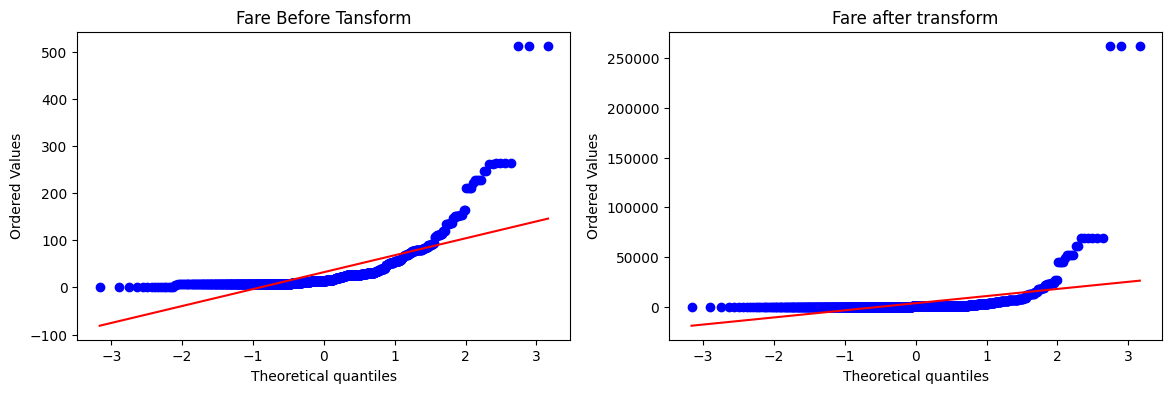

In [27]:
apply_transform(lambda x: np.square(x.to_numpy()).reshape(-1, 1))